In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/20-newsgroup-preprocessed/20newsgroup_preprocessed.csv


# Import Library

In [2]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import tensorflow as tf

# from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder


# plt.style.use('ggplot')

# Load Dataset

In [3]:
# with open('/kaggle/input/20-newsgroup-preprocessed/20newsgroup_preprocessed.csv', 'r') as file:
#     for i, line in enumerate(file):
#         print(f"Line {i+1}: {line}")
#         if i == 20:  # Stop after line 21
#             break

In [20]:
# def plot_history(history):
#     acc = history.history['accuracy']
#     val_acc = history.history['val_accuracy']
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
    
#     x = range(1, len(acc) + 1)

#     plt.figure(figsize=(16, 5))

#     plt.subplot(1, 2, 1)
#     plt.plot(x, acc, label='training accuracy')
#     plt.plot(x, val_acc, label='validation accuracy')
#     plt.title('Accuracy')
#     plt.legend()
    
#     plt.subplot(1, 2, 2)
#     plt.plot(x, loss, label='training loss')
#     plt.plot(x, val_loss, label='validation loss')
#     plt.title('Loss')
#     plt.legend()

In [22]:
df_newsgroup = pd.read_csv('/kaggle/input/20-newsgroup-preprocessed/20newsgroup_preprocessed.csv', sep=';', usecols=['target', 'text_cleaned'])
df_newsgroup.rename(columns={'text_cleaned' : 'text'}, inplace=True)

In [6]:
df_newsgroup.head()

,target,text
0,alt.atheism,atheist resources addresses atheist organizati...
1,alt.atheism,begin pgp signed message introduction atheism ...
2,alt.atheism,article charley wingate writes well john quite...
3,alt.atheism,kings become philosophers philosophers become ...
4,alt.atheism,article bob mcgwier writes however hate econom...


In [7]:
df_newsgroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18828 entries, 0 to 18827
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  18828 non-null  object
 1   text    18792 non-null  object
dtypes: object(2)
memory usage: 294.3+ KB


In [8]:
df_newsgroup.target.value_counts()

target
rec.sport.hockey            999
soc.religion.christian      997
rec.sport.baseball          994
rec.motorcycles             994
sci.crypt                   991
rec.autos                   990
sci.med                     990
sci.space                   987
comp.os.ms-windows.misc     985
comp.sys.ibm.pc.hardware    982
sci.electronics             981
comp.windows.x              980
comp.graphics               973
misc.forsale                972
comp.sys.mac.hardware       961
talk.politics.mideast       940
talk.politics.guns          910
alt.atheism                 799
talk.politics.misc          775
talk.religion.misc          628
Name: count, dtype: int64

In [9]:
# df_newsgroup.target.unique()

In [10]:
# df_newsgroup.text.value_counts()

In [11]:
# df_newsgroup.text.unique()

In [12]:
df_newsgroup.isnull().sum()

target     0
text      36
dtype: int64

# Preprocessing

In [13]:
df_newsgroup.dropna(inplace=True)
df_newsgroup.isnull().sum()

target    0
text      0
dtype: int64

# Feature Extraction

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_newsgroup['text'])


# Clustering

* K-Means Clustering: Apply K-Means clustering to group similar articles. Determine the optimal number of clusters using methods like the elbow method.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


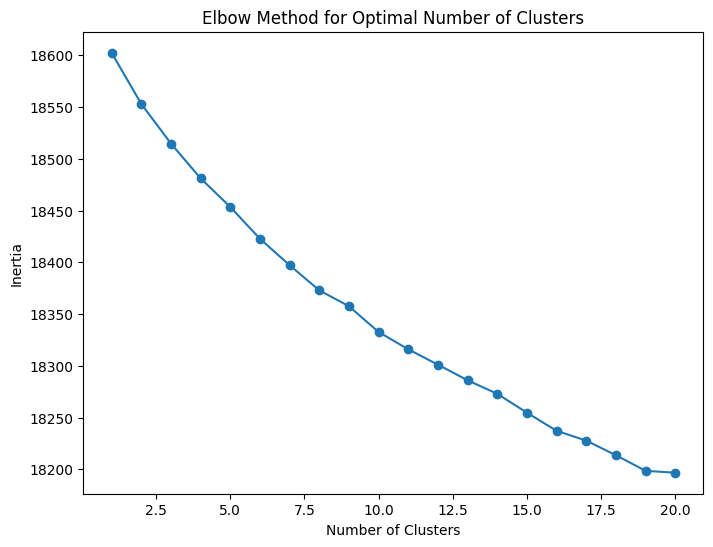

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters
inertia = []
for n in range(1, 21):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


* After identifying the optimal number of clusters (let's say k), fit the K-Means model:

In [16]:
k = 5  # Example value; replace with the optimal number
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_


# Evaluation

In [17]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.002173338653033987


# Visualization

* 2D Plot: Visualize the clusters using dimensionality reduction techniques like PCA (Principal Component Analysis).

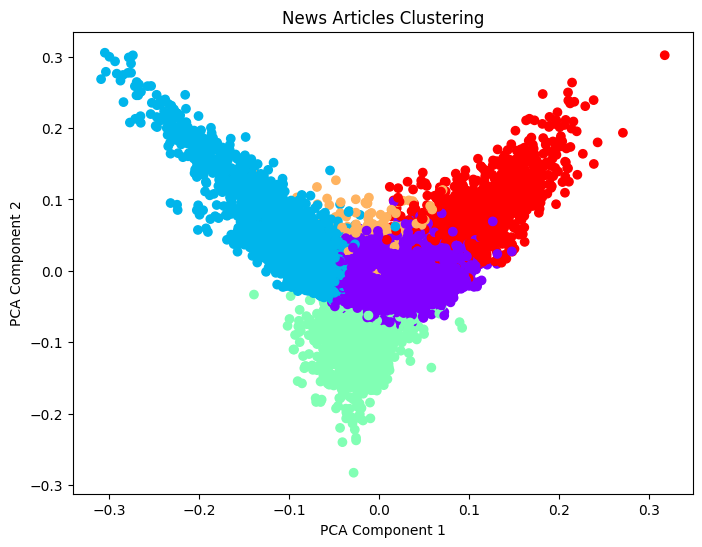

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.title('News Articles Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


#  Additional Resources

* For a comprehensive understanding and advanced techniques in text clustering, consider exploring the following resource:

Text Clustering: Grouping News Articles in Python 
MACHINE LEARNING GEEK
This guide provides practical insights and code examples for clustering news articles.